# Strain Stock gDNA Sequencing Analysis
## Seq Library: Plasmidsaurus_10-06-2025_P4CYGL

Processing started on 11-6-25 on Poplar.

## Steps
1. Data organization, file renaming
2. Short reads: QA/QC
3. Short reads: Breseq (refseqs: ADP1, ACN2821)
3. Long read: QA/QC
4. Long reads: Blast analysis

In [35]:
## Running on poplar
## Make sure running in appropriate kernel

import sys, os

# Must add environment's bin to the PATH inside the notebook
env_bin = os.path.join(os.path.dirname(sys.executable), "")
os.environ["PATH"] = env_bin + ":" + os.environ["PATH"]

# Must add ai_synbio repo to PATH
sys.path.append('/home/nspahr/code/ai_synbio_data_processing/')

In [40]:
# Reload magic command to ensure that changes made to my imported modules are being picked up by the notebook continuously

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
# Define AI-Synbio project data directories

LIB_DIR = '/storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/'
library = 'Plasmidsaurus_10-06-2025_P4CYGL'
lib_path = os.path.join(LIB_DIR, library)
shortlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Illumina')
longlib = os.path.join(lib_path, os.path.basename(lib_path) + '_Nanopore')

In [68]:
# Define my Jupyter Hub home directories for viewing intermittent results

home_lib_path = os.path.join('/storage/nspahr/', 'lib_analysis', library)
os.makedirs(home_lib_path, exist_ok=True)

## Short reads: QA/QC

In [23]:
short_received = os.path.join(shortlib, 'received')

In [90]:
import os
from binfo_utils import create_manifest

manifest = create_manifest(short_received, platform='plasmidsaurus_hybrid')
manifest

,sample_name,fwd_fastq,rvs_fastq
0,P4CYGL_1_ANLstock.ACN2586.colony1,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...
1,P4CYGL_2_ANLstock.ACN2586.colony2,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...
2,P4CYGL_3_ANLstock.ACN2586.colony3,/storage/synbio/ai_synbio_data/experimental_da...,/storage/synbio/ai_synbio_data/experimental_da...


In [92]:
# Rename Illumina fastqs

for index, row in manifest.iterrows():
    old_fwd_name = os.path.basename(row['fwd_fastq'])
    new_fwd_name = ('_').join(old_fwd_name.split('_')[2:])
    new_fwd_path = os.path.join(os.path.dirname(row['fwd_fastq']), new_fwd_name)
    os.rename(row['fwd_fastq'], new_fwd_path)
    old_rvs_name = os.path.basename(row['rvs_fastq'])
    new_rvs_name = ('_').join(old_rvs_name.split('_')[2:])
    new_rvs_path = os.path.join(os.path.dirname(row['rvs_fastq']), new_rvs_name)
    os.rename(row['rvs_fastq'], new_rvs_path)

### QC1

In [38]:
from read_qc import run_fastqc
from binfo_utils import create_manifest

manifest = create_manifest(short_received, platform='plasmidsaurus_hybrid')

[run_fastqc(f) for f in manifest['fwd_fastq']]
[run_fastqc(f) for f in manifest['rvs_fastq']]

Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Approx 60% complete for P4CYGL_1_ANLstock.ACN2586.colony1

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Approx 60% complete for P4CYGL_2_ANLstock.ACN2586.colony2

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Approx 60% complete for P4CYGL_3_ANLstock.ACN2586.colony3

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Approx 60% complete for P4CYGL_1_ANLstock.ACN2586.colony1

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Approx 60% complete for P4CYGL_2_ANLstock.ACN2586.colony2

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz
Approx 60% complete for P4CYGL_3_ANLstock.ACN2586.colony3

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2.fastq.gz


[None, None, None]

In [71]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(short_received)
shutil.copy(multiqc_report, home_lib_path)


/// ]8;id=391020;https://multiqc.info\MultiQC]8;;\ v1.32

       file_search | Search path: /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received


        searching | ████████████████████████████████████████ 100% 18/18                                                   html

            fastqc | Found 6 reports
     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


'/storage/nspahr/lib_analysis/Plasmidsaurus_10-06-2025_P4CYGL/multiqc_report.html'

### Trimming

MultiQC report indicated poly-G tails in read 2

In [72]:
import subprocess
from binfo_utils import create_manifest

short_trimmed = os.path.join(shortlib, 'trimmed')
os.makedirs(short_trimmed, exist_ok=True)

manifest = create_manifest(short_received, platform='plasmidsaurus_hybrid')

for index, row in manifest.iterrows():

    read1 = str(os.path.basename(row['fwd_fastq'])).replace('.fastq.gz', '_trimmed.fastq.gz') 
    read2 = str(os.path.basename(row['rvs_fastq'])).replace('.fastq.gz', '_trimmed.fastq.gz')
    sample_name = row['sample_name']
    
    cutadapt_cmd = [
        'cutadapt',
        '-j', '10',
        '-q', '15, 15',  # quality cut-off, trimmed from both reads
        '-A', 'G{10}',  # fastQC indicated poly-G in read 2
        '--revcomp',
        '--minimum-length',  '20',
        '-o', os.path.join(short_trimmed, read1),
        '-p', os.path.join(short_trimmed, read2),
        row['fwd_fastq'],
        row['rvs_fastq'],
        f'--json={sample_name}.cutadapt.json'
    ]

    subprocess.run(cutadapt_cmd, check=True, cwd=short_trimmed)

This is cutadapt 5.2 with Python 3.12.12
Command line parameters: -j 10 -q 15, 15 -A G{10} --revcomp --minimum-length 20 -o /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz -p /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1.fastq.gz /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/received/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2.fastq.gz --json=P4CYGL_1_ANLstock.ACN258

### QC2

In [73]:
from read_qc import run_fastqc
from binfo_utils import create_manifest

manifest = create_manifest(short_trimmed, platform='plasmidsaurus_hybrid')

[run_fastqc(f) for f in manifest['fwd_fastq']]
[run_fastqc(f) for f in manifest['rvs_fastq']]

Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN258

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN258

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN258

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R1_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 5% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 10% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 15% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 20% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 25% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 30% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 35% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 40% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 45% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 50% complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Approx 55% complete for P4CYGL_1_ANLstock.ACN258

Analysis complete for P4CYGL_1_ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 5% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 10% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 15% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 20% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 25% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 30% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 35% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 40% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 45% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 50% complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Approx 55% complete for P4CYGL_2_ANLstock.ACN258

Analysis complete for P4CYGL_2_ANLstock.ACN2586.colony2_illumina_R2_trimmed.fastq.gz
Running FastQC on /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 5% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 10% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 15% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 20% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 25% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 30% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 35% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 40% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 45% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 50% complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz
Approx 55% complete for P4CYGL_3_ANLstock.ACN258

Analysis complete for P4CYGL_3_ANLstock.ACN2586.colony3_illumina_R2_trimmed.fastq.gz


[None, None, None]

In [74]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(short_trimmed)
shutil.copy(multiqc_report, home_lib_path)


/// ]8;id=459103;https://multiqc.info\MultiQC]8;;\ v1.32

       file_search | Search path: /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed
          cutadapt | Found 3 reports


        searching | ████████████████████████████████████████ 100% 21/21                                                   html

            fastqc | Found 6 reports
     write_results | Data        : multiqc_data
     write_results | Report      : multiqc_report.html
           multiqc | MultiQC complete


'/storage/nspahr/lib_analysis/Plasmidsaurus_10-06-2025_P4CYGL/multiqc_report.html'

## Short reads: Breseq

In [107]:
GENOME_DIR = '/storage/synbio/ai_synbio_data/reference_data/genomes'
genomes = ['ADP1_Neidle_CDM', 'ACN2821_CDM']

In [ ]:
import os
from binfo_utils import create_manifest
from breseq import run_breseq

# Create breseq directory
breseq = os.path.join(shortlib, 'breseq')
os.makedirs(breseq, exist_ok=True)

manifest = create_manifest(short_trimmed, platform='plasmidsaurus_hybrid')

# Run breseq against both genomes
for genome in genomes:
    breseq_param = os.path.join(breseq, f'breseq_{genome}_pop')
    os.makedirs(breseq_param, exist_ok = True)
    genome_path = os.path.join(GENOME_DIR, genome+'.gbk')
    
    for index, row in manifest.iterrows():
        sample_dir = os.path.join(breseq_param, row['sample_name'])
        os.makedirs(sample_dir, exist_ok = True)
        run_breseq(genome_path, sample_dir, row['fwd_fastq'], row['rvs_fastq'], polymorphism_prediction=True)

Running breseq with command: breseq -r /storage/synbio/ai_synbio_data/reference_data/genomes/ADP1_Neidle_CDM.gbk /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/ANLstock.ACN2586.colony1_illumina_R1_trimmed.fastq.gz /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/trimmed/ANLstock.ACN2586.colony1_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /storage/synbio/ai_synbio_data/experimental_data/sequencing_libraries/Plasmidsaurus_10-06-2025_P4CYGL/Plasmidsaurus_10-06-2025_P4CYGL_Illumina/breseq/breseq_ADP1_Neidle_CDM_pop/ANLstock.ACN2586.colony1 -j 10 --polymorphism-prediction


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

In [ ]:
BELOW HAS NOT BEEN RUN!!!!!!!!!!!!!!!!

In [ ]:
# Must add title line to gdiff files so that samples named correctly in comparison.
# This has been added to the run_breseq function so this cell will not have to be run in the future

import os
from binfo_utils import create_manifest

manifest = create_manifest(short_trimmed, platform='plasmidsaurus_hybrid')

for genome in genomes:
    breseq_param = os.path.join(breseq, f'breseq_{genome}_pop')
    genome_path = os.path.join(GENOME_DIR, genome+'.gbk')
    
    for index, row in manifest.iterrows():
        # Add #=TITLE sample_name to genome diff file
        sample_dir = os.path.join(breseq_param, row['sample_name'])
        gd_file = os.path.join(sample_dir, 'data', 'output.gd')
        # Read the existing content
        with open(gd_file, 'r') as f:
            content = f.readlines()
        # Add the title line at the beginning
        title_line = f'#=TITLE\t{row['sample_name']}\n'
        # content.insert(0, title_line)
        # # Write back the modified content
        # with open(gd_file, 'w') as f:
        #     f.writelines(content)
        print(title_line)############################     TESTING

In [90]:
import os
from breseq import compare_gdiff

# Compare gdiff files in each breseq_param directory

# Function that grabs all gdiffs from sample dir
def fetch_gdiffs_from_breseq_params_dir(breseq_param_dir):
    gdiffs = []
    subfolders = [x for x in os.listdir(breseq_param_dir) if os.path.isdir(x)]
    for folder in subfolders:
        gdiffs.append(os.path.join(folder, 'data', 'output.gd'))
    return gdiffs

# Generate comparison files in html and csv format
for genome in genomes:
    breseq_param = os.path.join(breseq, f'breseq_{genome}_pop')
    genome_path = os.path.join(GENOME_DIR, genome+'.gbk')

    compare_gdiff(
        genome_path,
        os.path.join(breseq_param, 'comparison.html'),
        fetch_gdiffs_from_breseq_params_dir(breseq_param)
    )
        compare_gdiff(
        genome_path,
        os.path.join(breseq_param, 'comparison.csv'),
        fetch_gdiffs_from_breseq_params_dir(breseq_param),
        format='CSV'
    )

## Long Reads: QA/QC

In [100]:
long_received = os.path.join(longlib, 'received')

In [101]:
import os
from binfo_utils import create_manifest

manifest = create_manifest(long_received, platform='plasmidsaurus_hybrid')
manifest

,sample_name,nanopore_fastq
0,P4CYGL_1_ANLstock.ACN2586.colony1,/storage/synbio/ai_synbio_data/experimental_da...
1,P4CYGL_2_ANLstock.ACN2586.colony2,/storage/synbio/ai_synbio_data/experimental_da...
2,P4CYGL_3_ANLstock.ACN2586.colony3,/storage/synbio/ai_synbio_data/experimental_da...


In [102]:
# Rename Nanopore fastqs

for index, row in manifest.iterrows():
    old_name = os.path.basename(row['nanopore_fastq'])
    new_name = ('_').join(old_name.split('_')[2:])
    new_path = os.path.join(os.path.dirname(row['nanopore_fastq']), new_name)
    os.rename(row['nanopore_fastq'], new_path)

### QC1

In [ ]:
## Running nanocomp (have to activate nanocomp_env first. Some incompatibility with tool in bre_env)

In [4]:
from read_qc import run_nanocomp

manifest = create_manifest(long_received, platform='plasmidsaurus_hybrid')

run_nanocomp(
    manifest['nanopore_fastq'].to_list(),
    manifest['sample_name'].to_list(),
    os.path.join(long_received, 'nanocomp_reports'),
    threads=10)

In [ ]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(long_received)
shutil.copy(multiqc_report, home_lib_path)

### Filtering

In [5]:
from read_qc import run_filtlong

long_filtered = os.path.join(longlib, 'filtered')
os.makedirs(long_filtered, exist_ok=True)

manifest = create_manifest(long_received, platform='plasmidsaurus_hybrid')

[run_filtlong(f, filtered, min_length=1000, keep_percent=90) for f in manifest['nanopore_fastq']]

Running filtlong on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/received_fastq/ANLstock.ACN2586.colony1_nanopore.fastq.gz, output will be saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/filtered
Running filtlong on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/received_fastq/ANLstock.ACN2586.colony2_nanopore.fastq.gz, output will be saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/filtered
Running filtlong on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/received_fastq/ANLstock.ACN2586.colony3_nanopore.fastq.gz, output will be saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/filtered


['/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/filtered/ANLstock.ACN2586.colony1_nanopore_filtered.fastq.gz',
 '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/filtered/ANLstock.ACN2586.colony2_nanopore_filtered.fastq.gz',
 '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-30-2025_P4CYGL_prelim/long_reads/filtered/ANLstock.ACN2586.colony3_nanopore_filtered.fastq.gz']

### QC2

In [6]:
from read_qc import run_nanocomp

manifest = create_manifest(long_filtered, platform='plasmidsaurus_hybrid')

run_nanocomp(
    manifest['nanopore_fastq'].to_list(),
    manifest['sample_name'].to_list(),
    os.path.join(long_filtered, 'nanocomp_reports'),
    threads=10)

In [ ]:
from read_qc import run_multiqc
import shutil

multiqc_report = run_multiqc(long_received)
shutil.copy(multiqc_report, home_lib_path)

In [ ]:
!!!!!!!!!!!!!!!!! CODE BELOW SIMPLY COPIED FROM HTGS8F LIBRARY. NEED TO BE ADAPTED

## Long reads: Blast analysis

In [ ]:
# Make sure to run in blast_env

In [ ]:
# Not sure what other files are in blast_dir. Maybe delete?

In [ ]:
BLAST_DIR = '/storage/synbio/ai_synbio_data/reference_data/blast_dbs/'
blast_db = 'ADP1_Neidle_dgoA_flanks'

In [ ]:
import os
from binfo_utils import create_manifest

base_dir = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F'
original = os.path.join(base_dir, 'received_fastq')
long_reads_dir = os.path.join(base_dir, 'long_reads')
short_reads_dir = os.path.join(base_dir, 'short_reads')
filtered = os.path.join(long_reads_dir, 'filtered')
manifest = create_manifest(filtered, platform='plasmidsaurus_hybrid')
manifest.sort_values('sample_name', inplace=True)
manifest.reset_index(drop=True, inplace=True)

In [105]:
from blast import blast_reads

blast = os.path.join(long_reads_dir, 'blast')
os.makedirs(blast, exist_ok=True)

manifest['blast_results'] = [
    blast_reads(
        x[1]['nanopore_fastq'],
        blast_db, 
        blast+'/'+ x[1]['sample_name']+'_blast_results.tsv'
        )[0]        
    for x in manifest.iterrows()
]


BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLst

In [106]:
# Define features that we will look for

from binfo_utils import json_to_dict

features = json_to_dict('/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/marker_features.json')

In [107]:
# Count reads

from binfo_utils import count_reads

manifest['n_reads'] = [
    count_reads(x)
    for x in manifest['nanopore_fastq']
]

In [108]:
from blast import process_flank_blast_results

manifest['both_flanks_blast_results'] = [
    process_flank_blast_results(x)[0][0]        
    for x in manifest['blast_results']
]

manifest['one_flank_blast_results'] = [
    process_flank_blast_results(x)[1][0]        
    for x in manifest['blast_results']
]

Processing /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_blast_results.tsv
No reads with both flanks in /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_blast_results.tsv.
Processing /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_blast_results.tsv
No reads with both flanks in /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_blast_results.tsv.
Processing /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads_blast_results.tsv
No reads with both flanks in /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_re

In [109]:
import pandas as pd

# Get number of reads per sample that have one flank, that have two flanks

manifest['n_reads_both_flanks'] = [
    int(len(pd.read_csv(x, sep='\t'))/2) # 2 flank results have 2 hits per read
    if x is not None else 0
    for x in manifest['both_flanks_blast_results']
]
    
manifest['n_reads_one_flank'] = [
    len(pd.read_csv(x, sep='\t'))
    if x is not None else 0
    for x in manifest['one_flank_blast_results']
]    

### Both flank results

File does not exist.
File does not exist.
File does not exist.


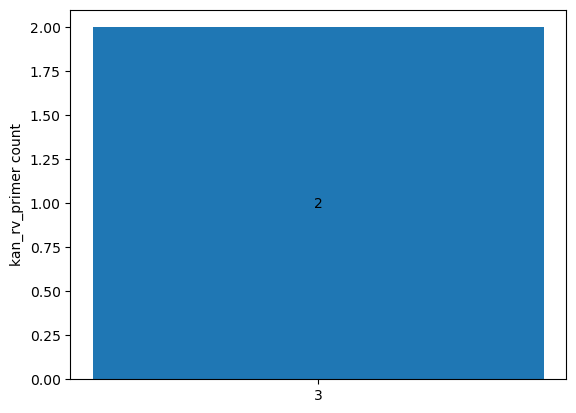

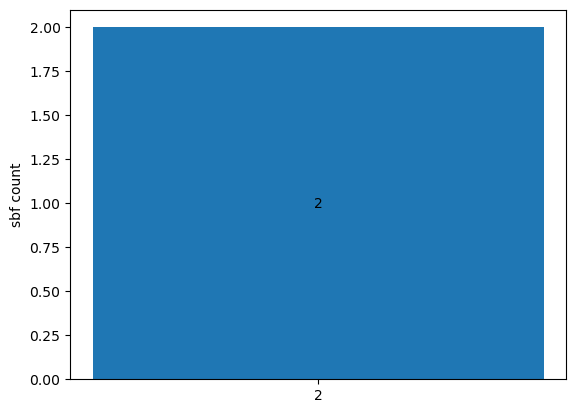

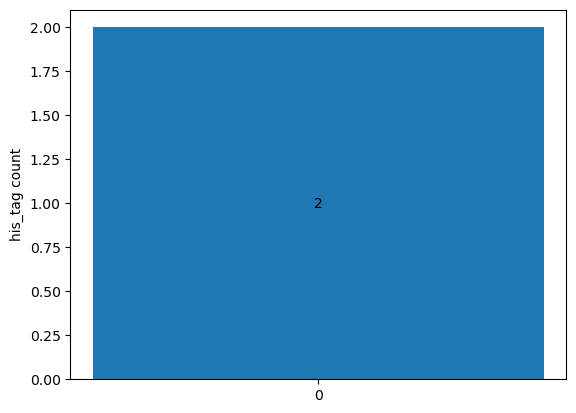

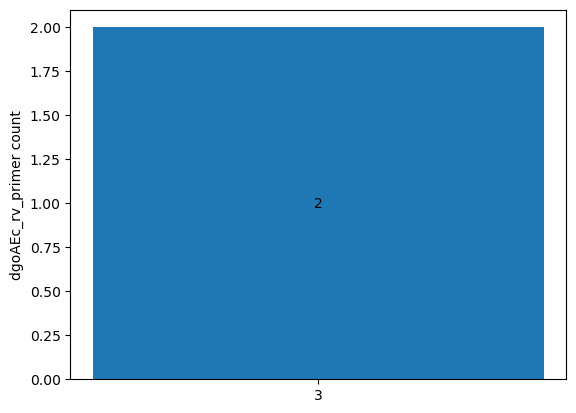

File does not exist.
File does not exist.


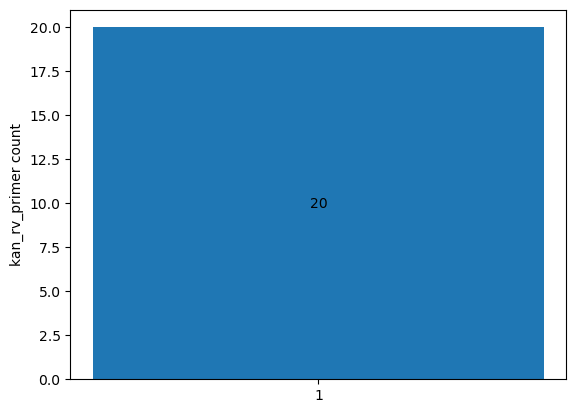

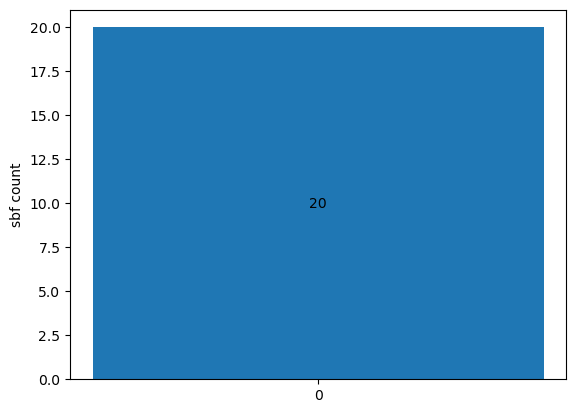

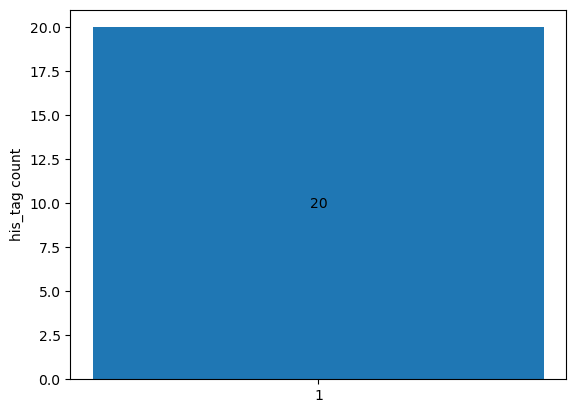

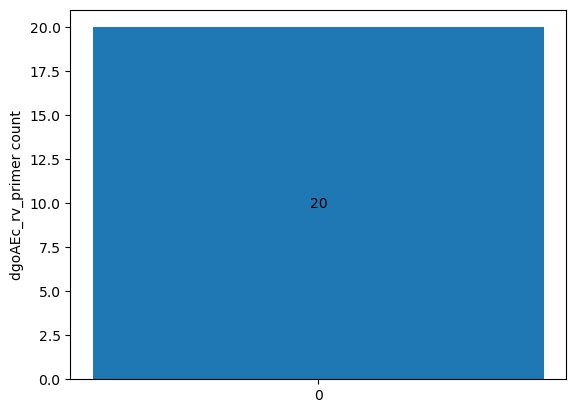

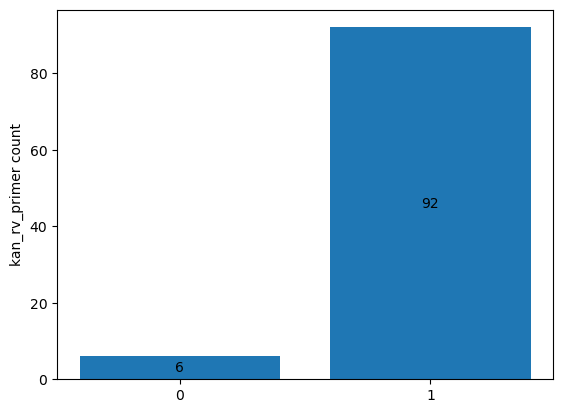

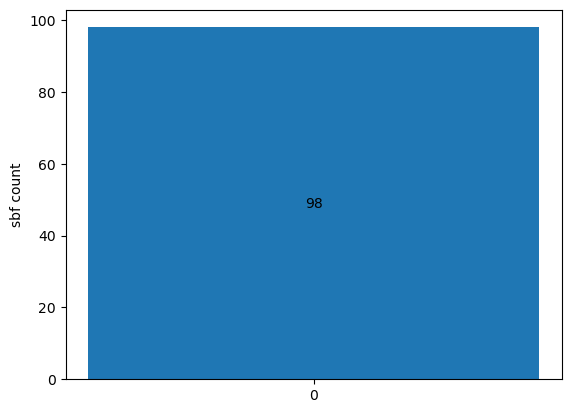

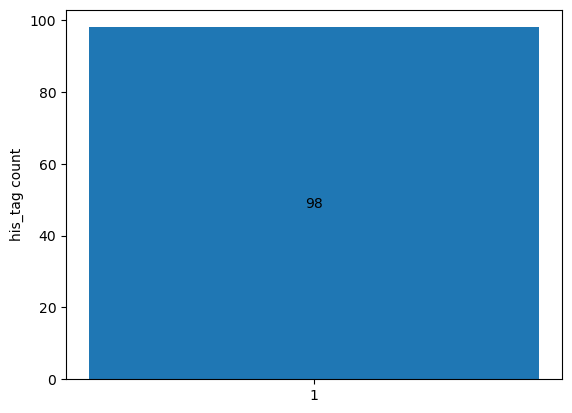

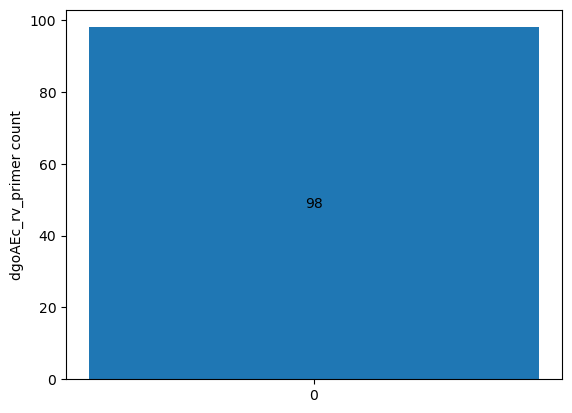

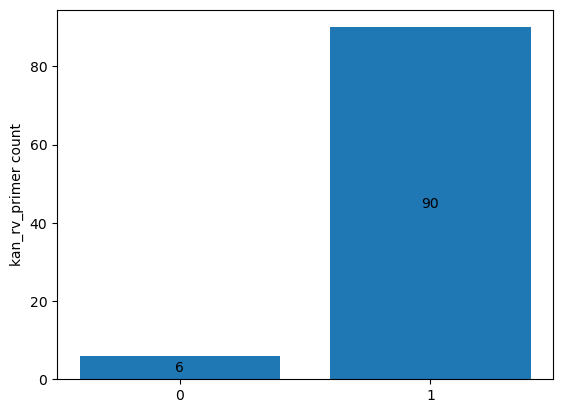

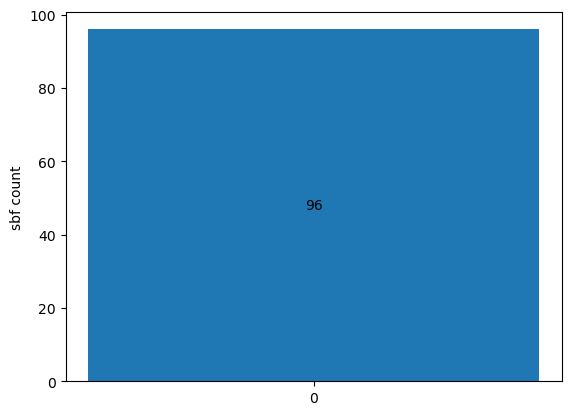

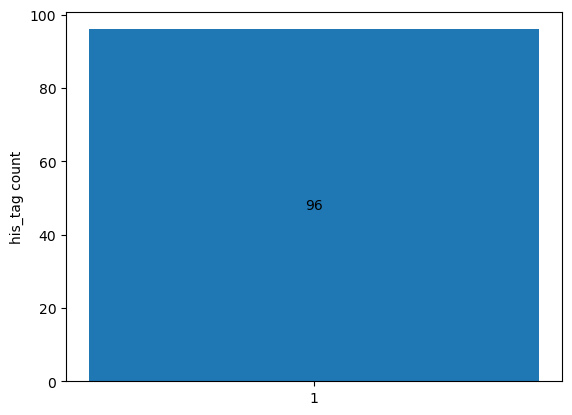

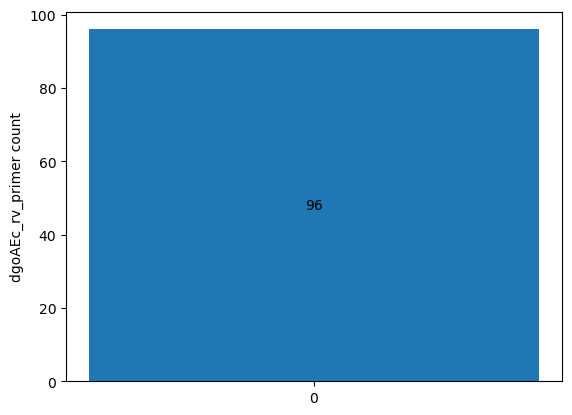

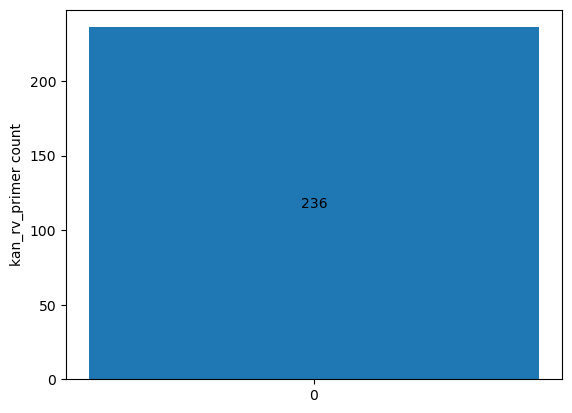

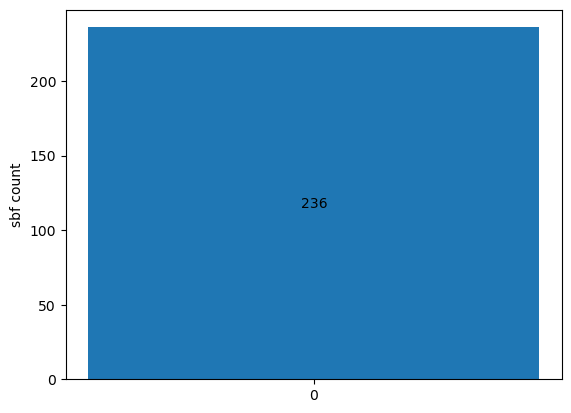

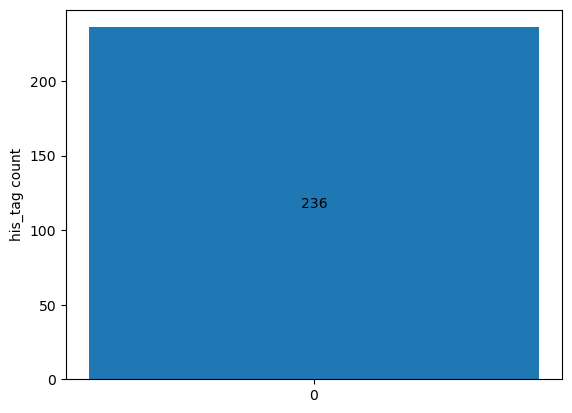

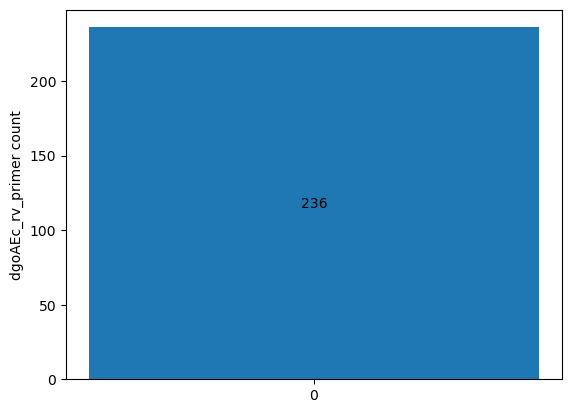

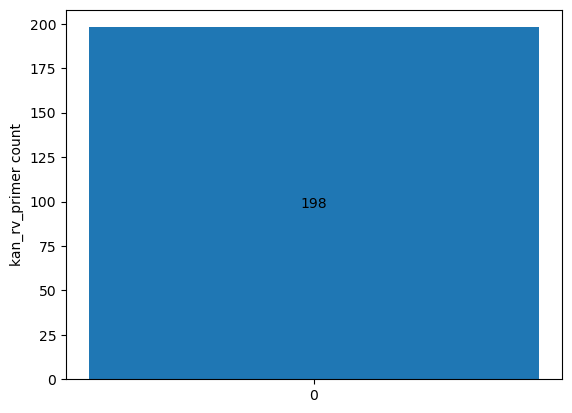

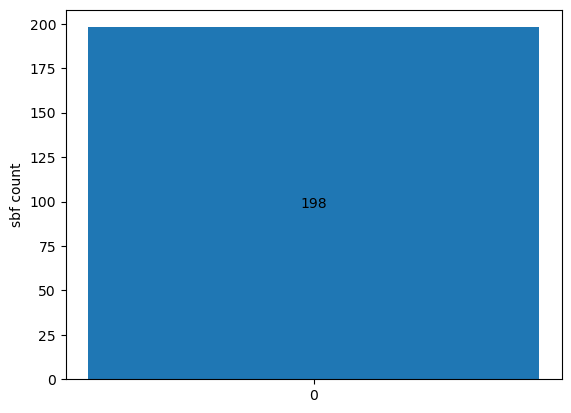

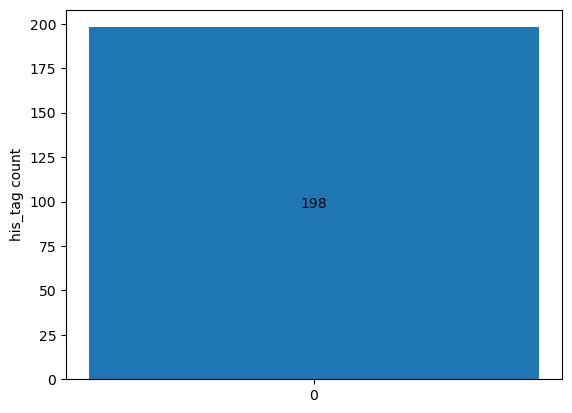

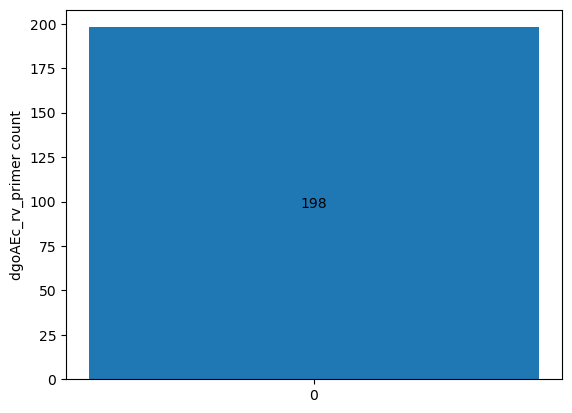

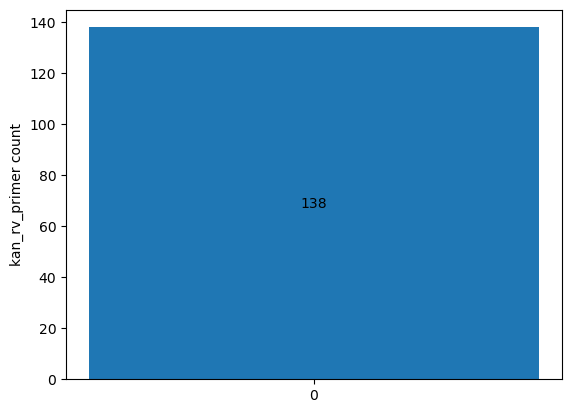

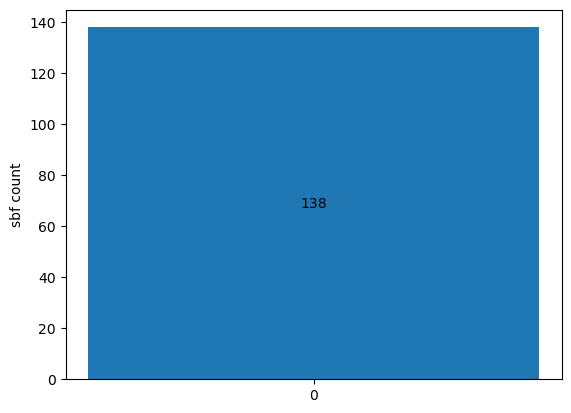

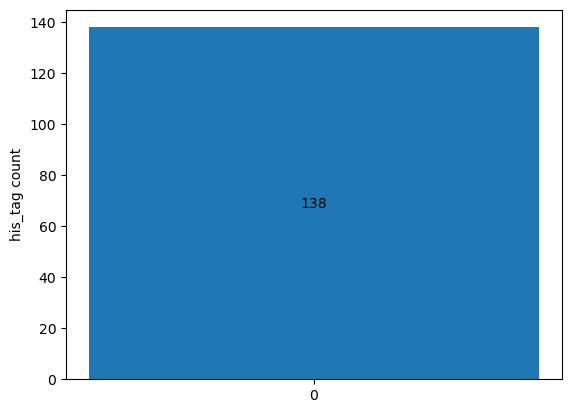

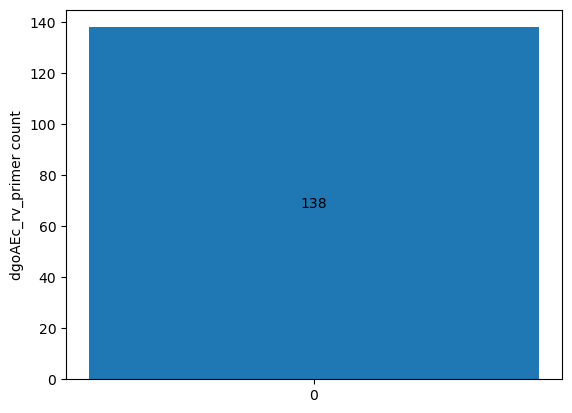

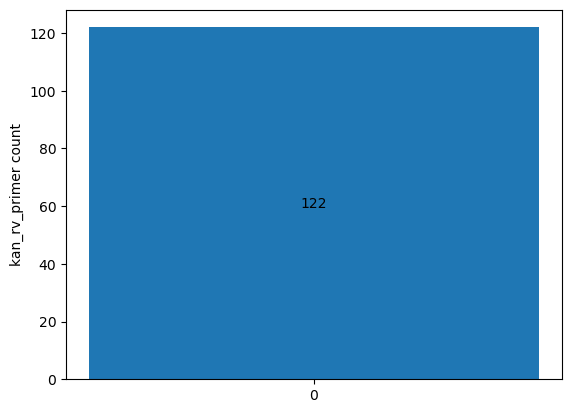

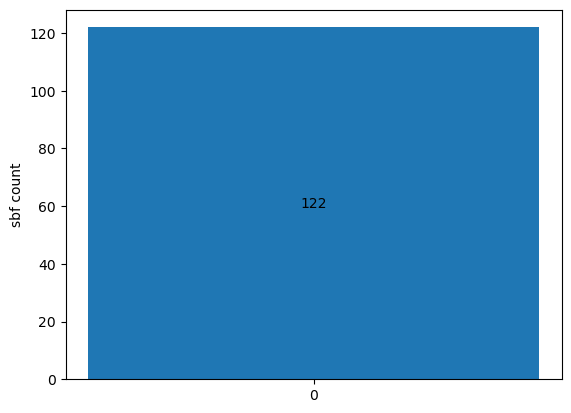

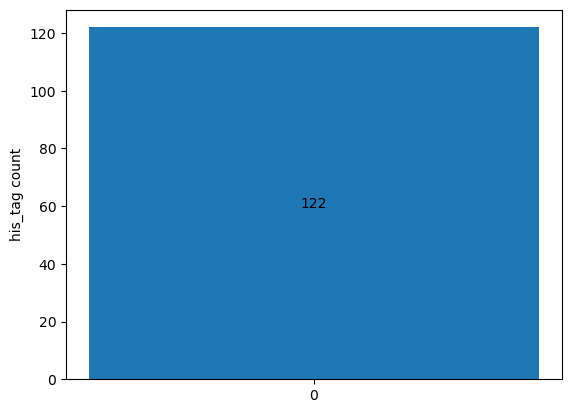

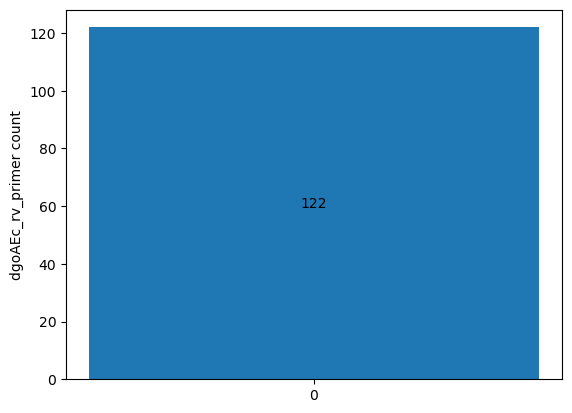

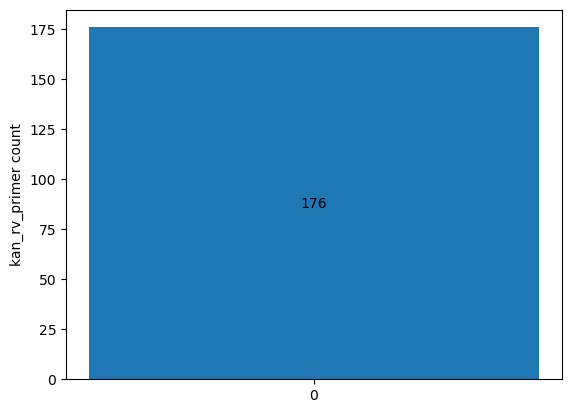

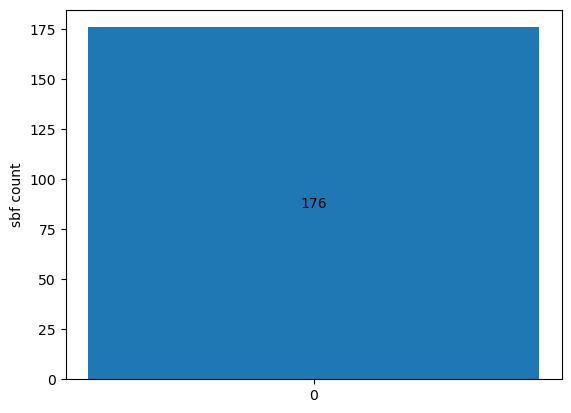

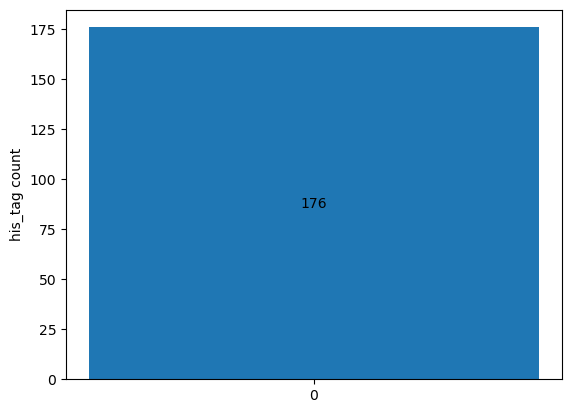

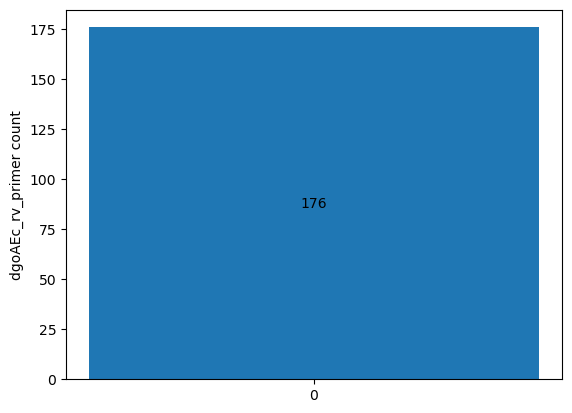

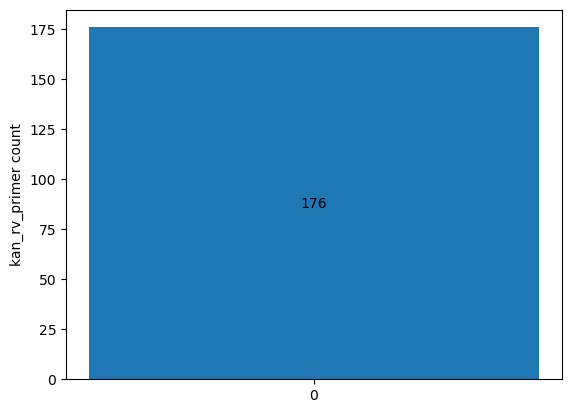

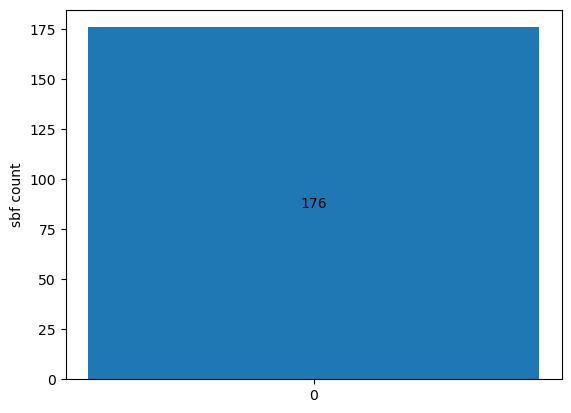

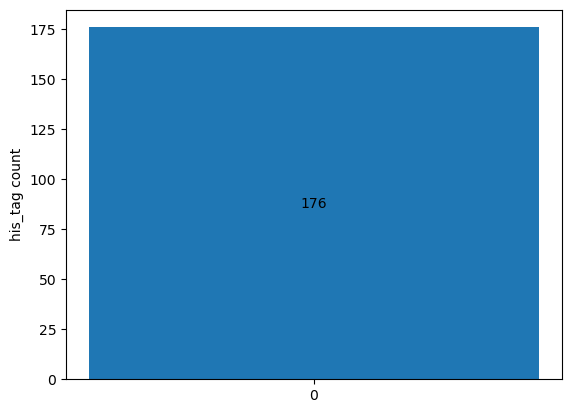

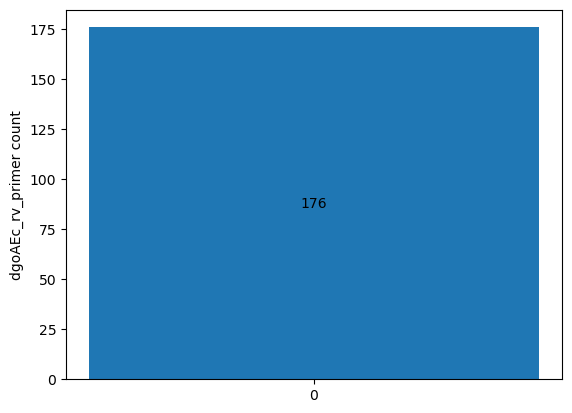

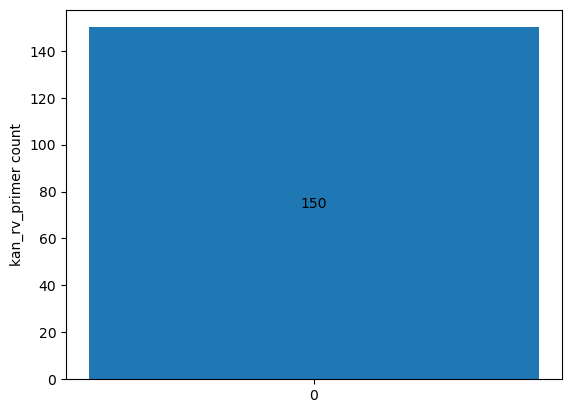

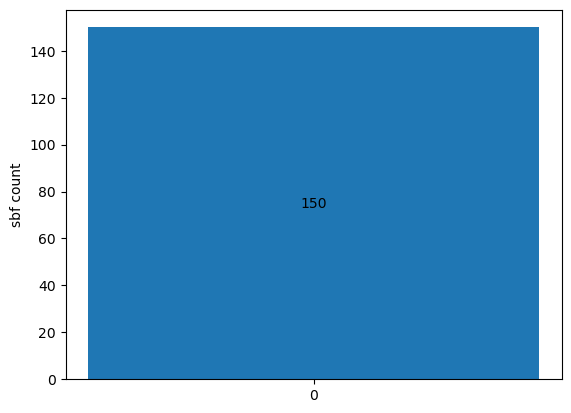

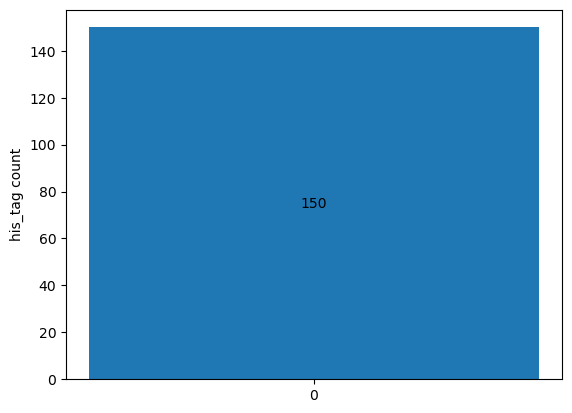

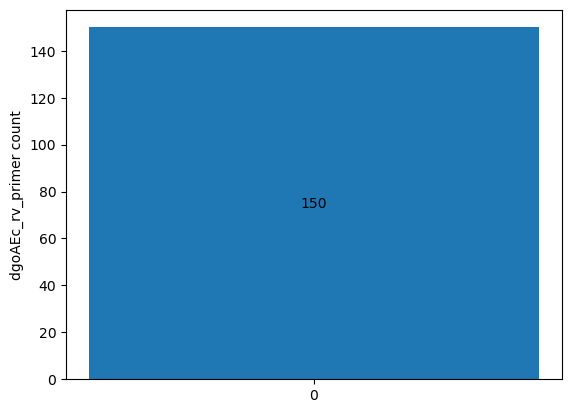

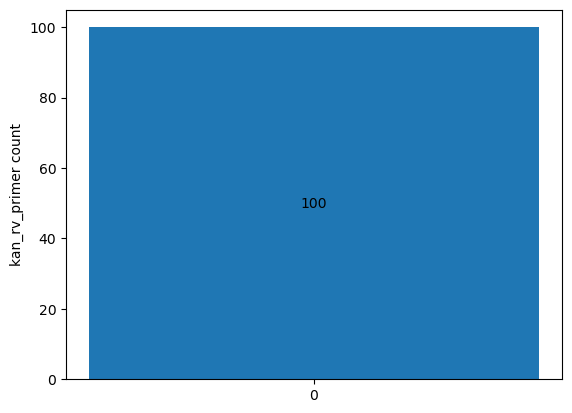

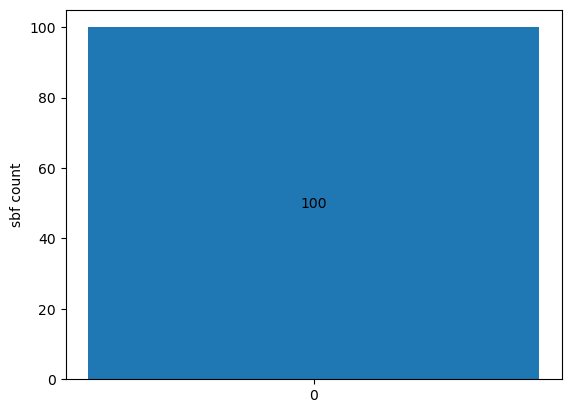

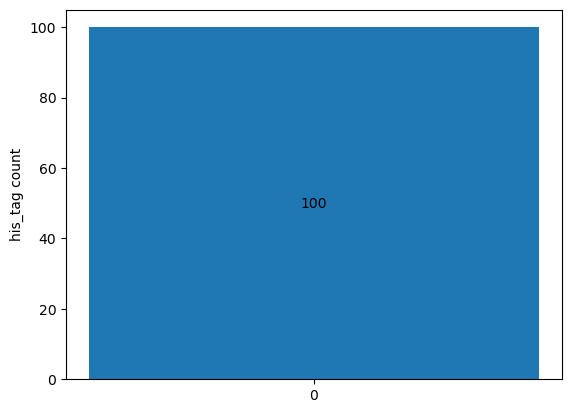

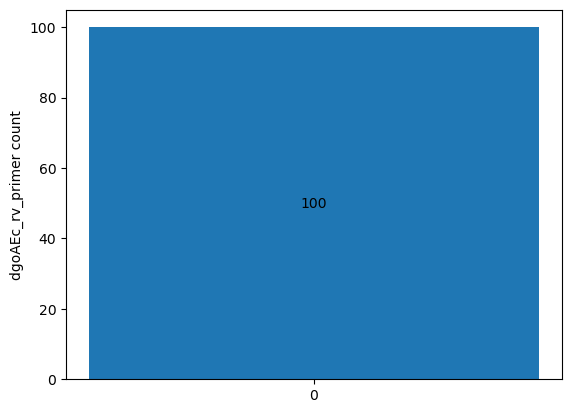

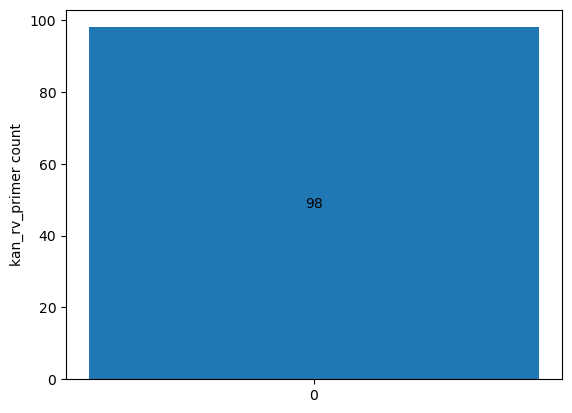

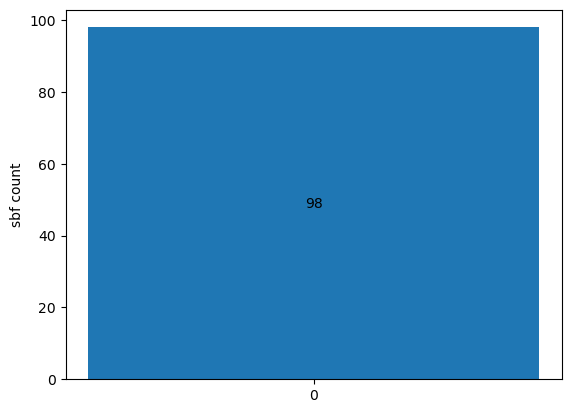

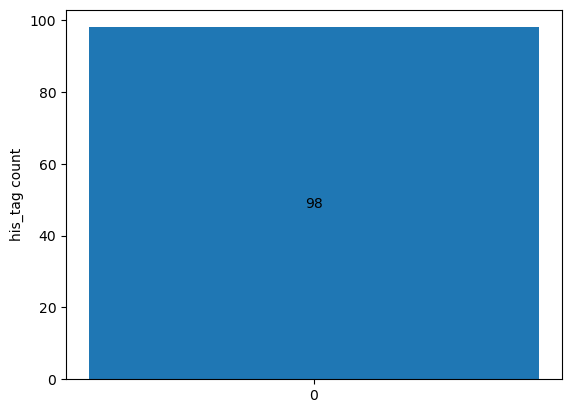

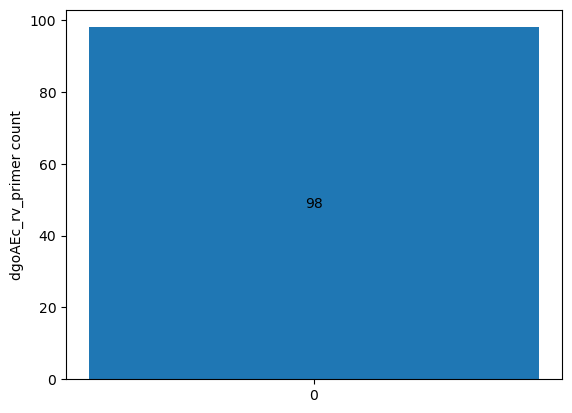

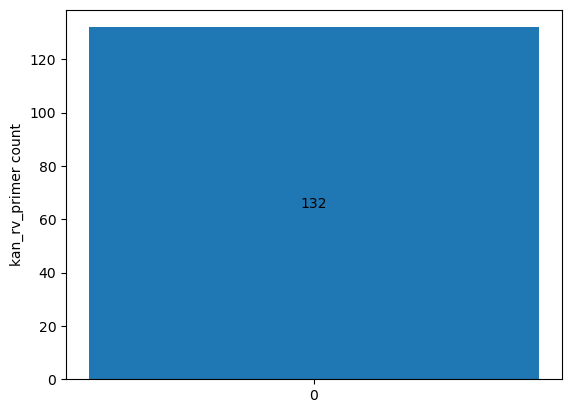

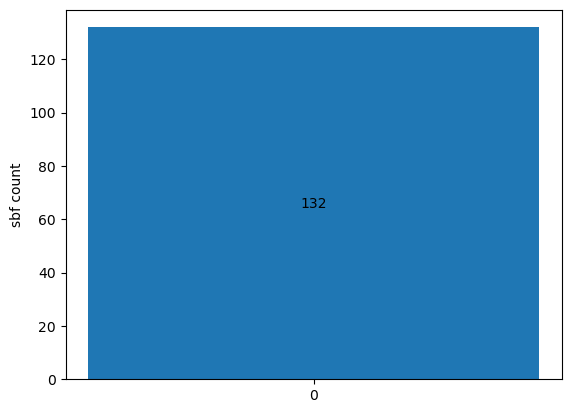

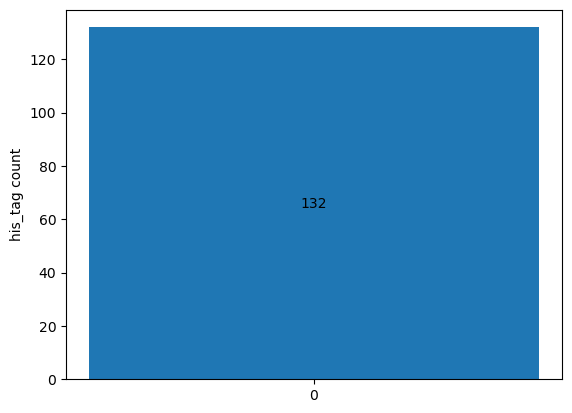

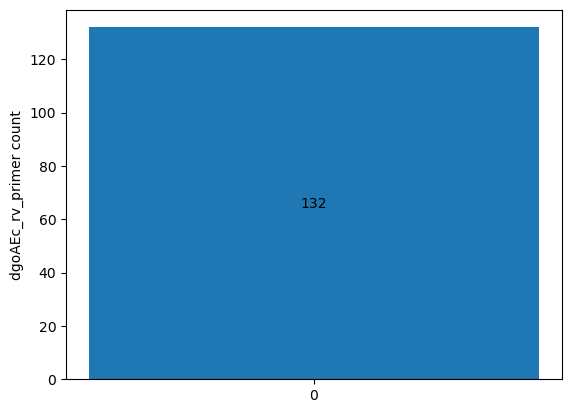

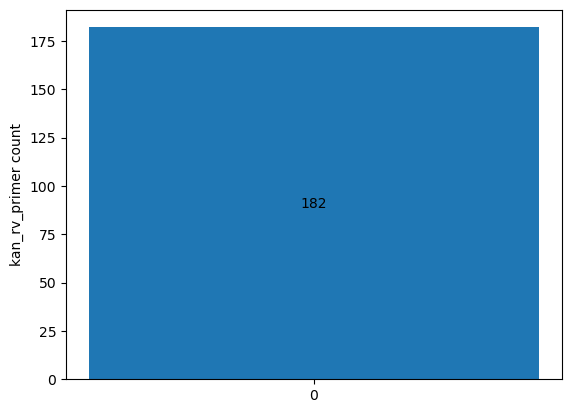

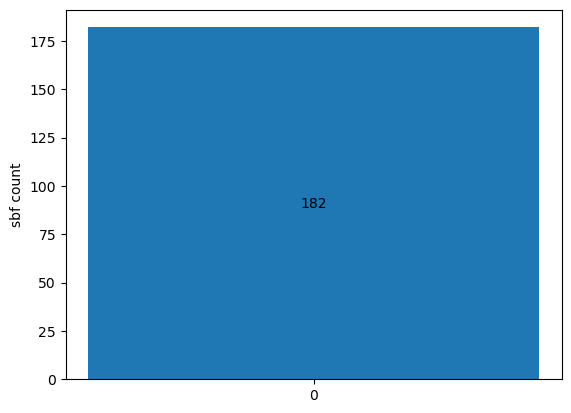

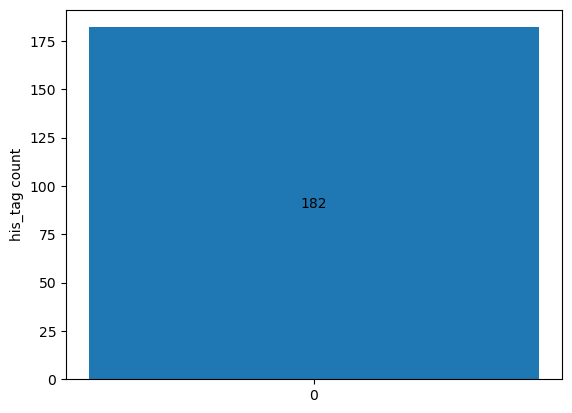

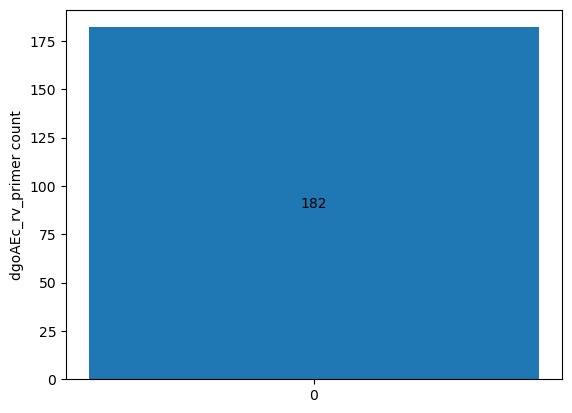

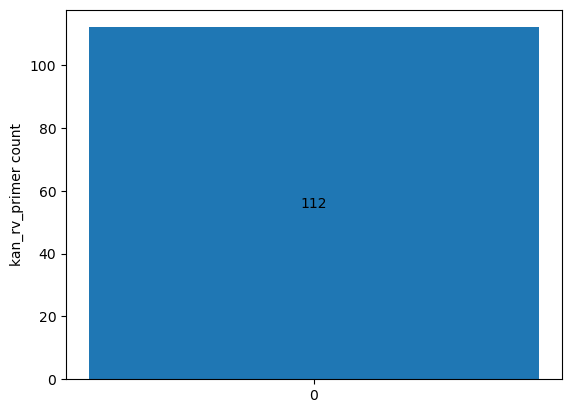

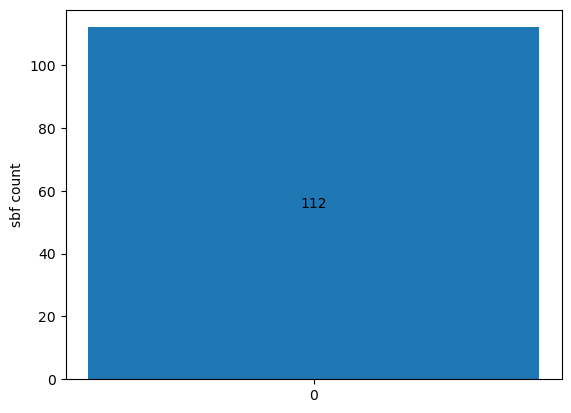

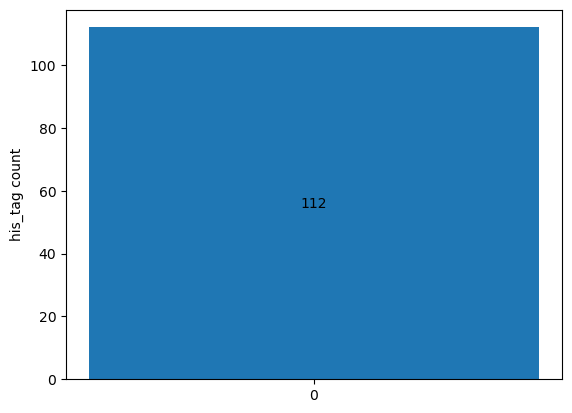

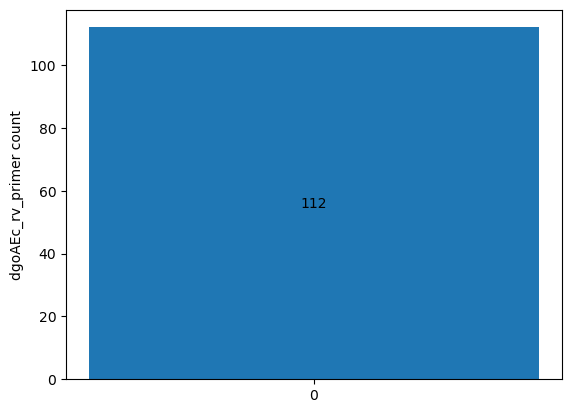

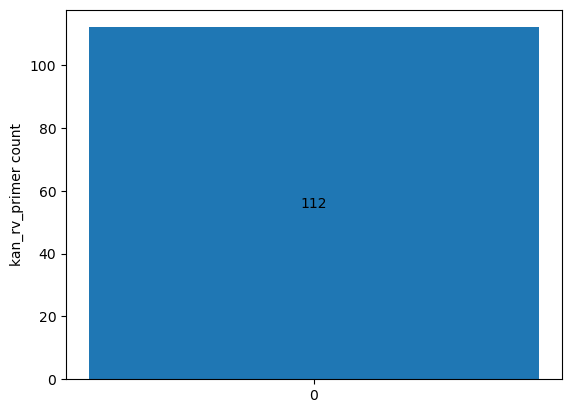

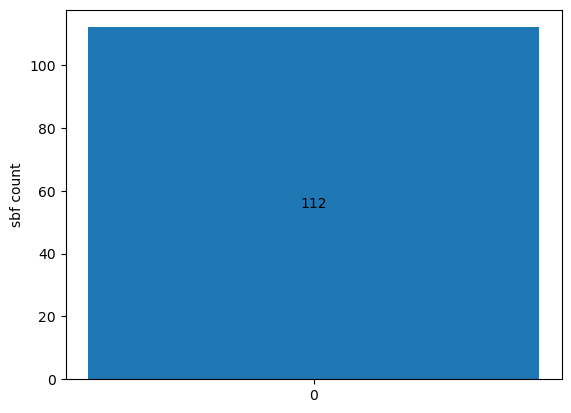

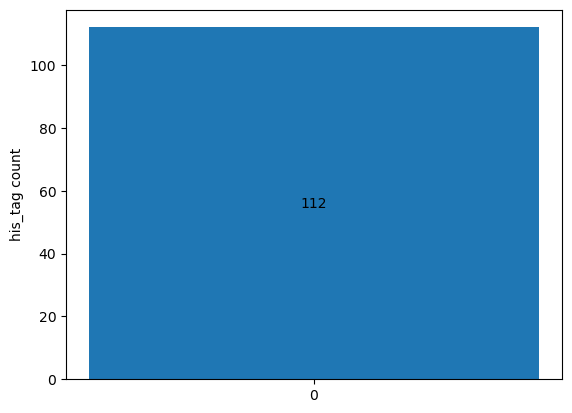

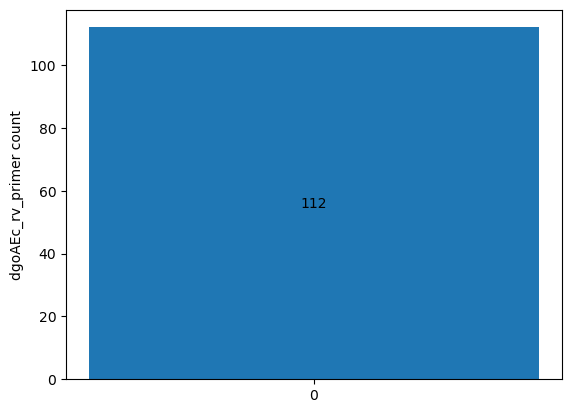

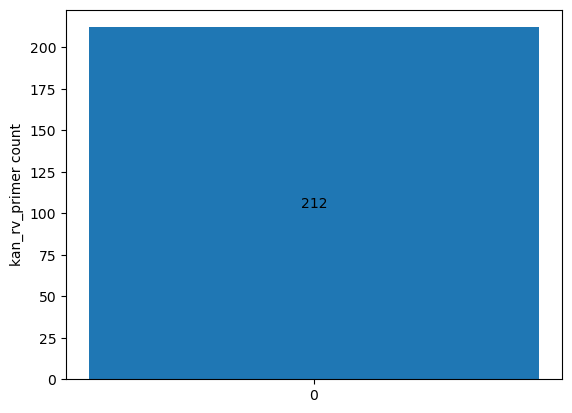

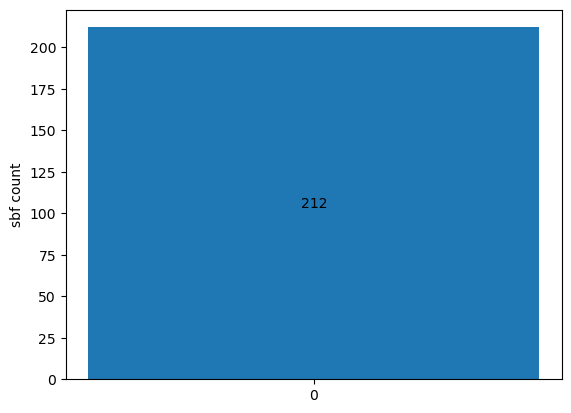

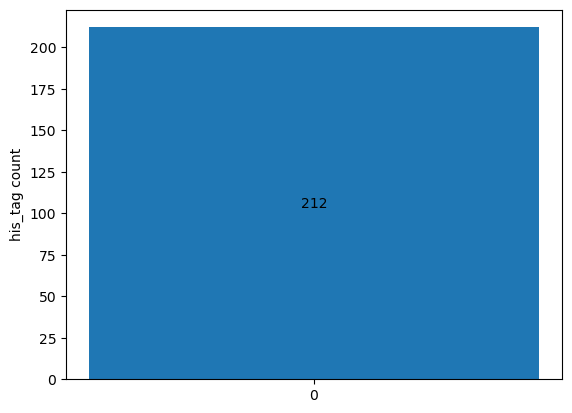

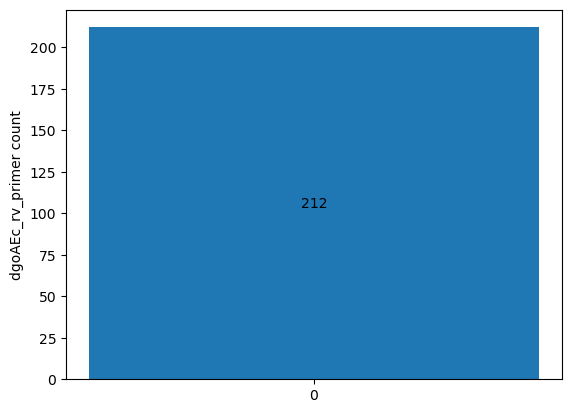

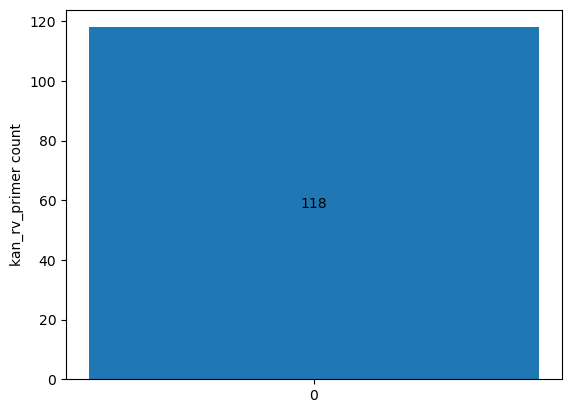

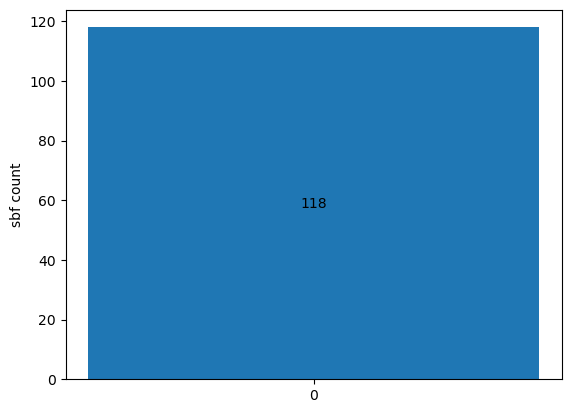

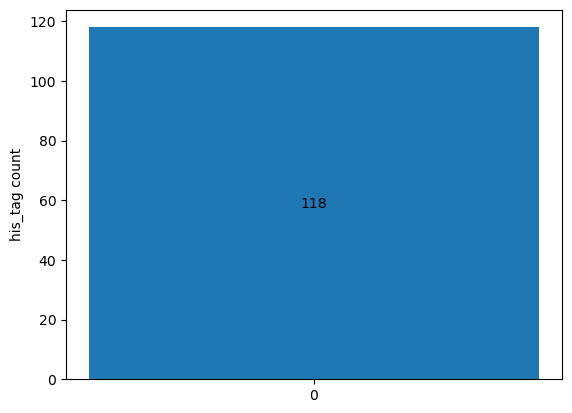

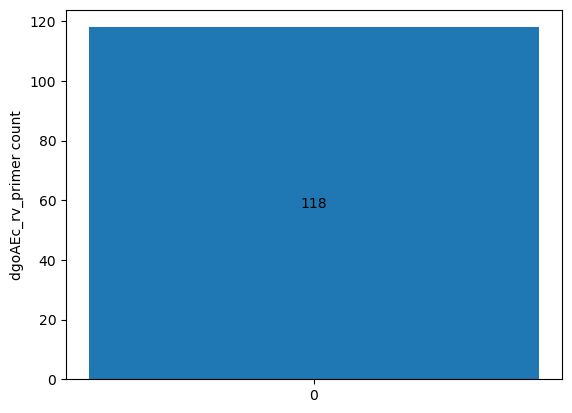

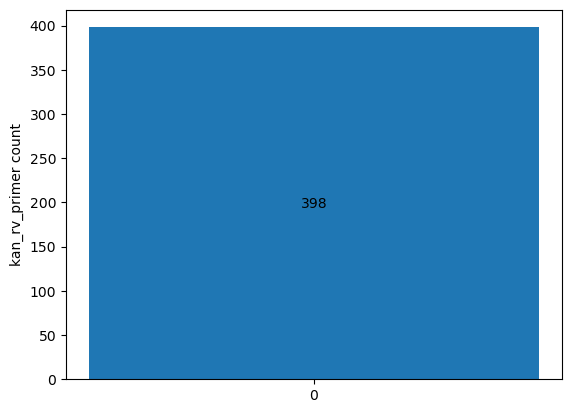

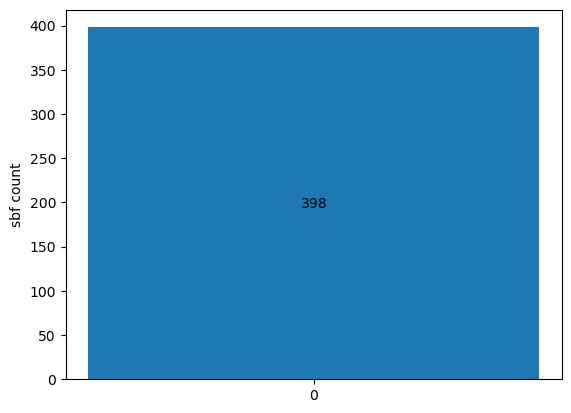

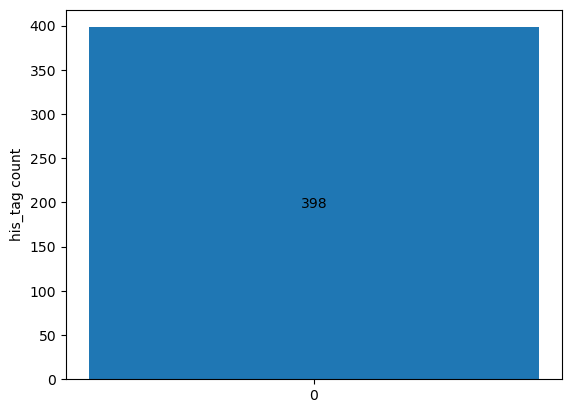

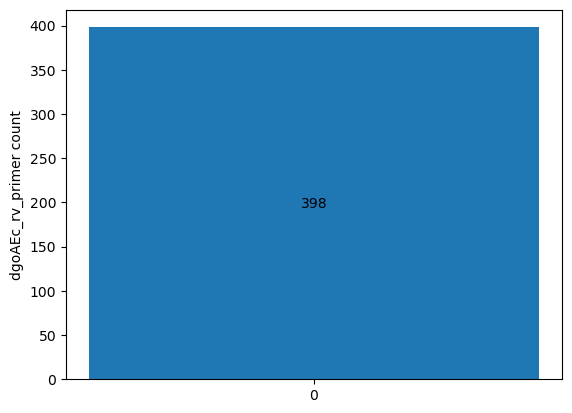

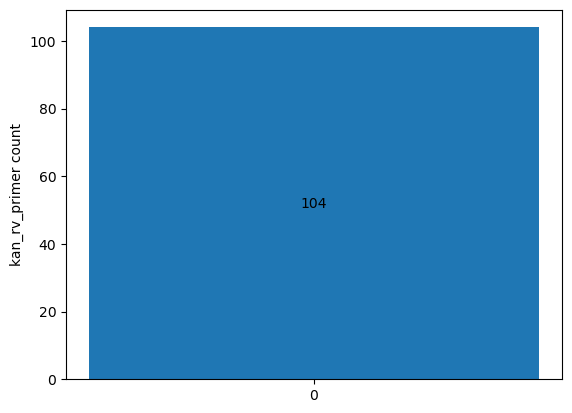

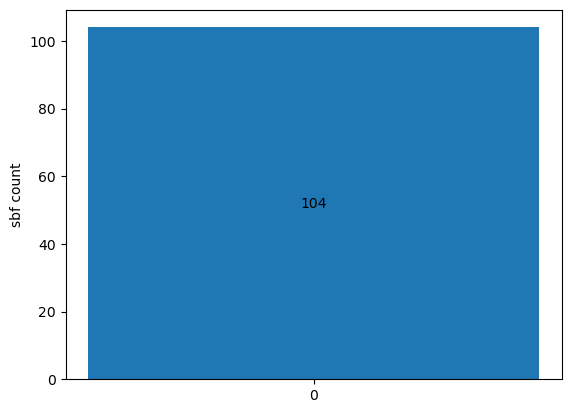

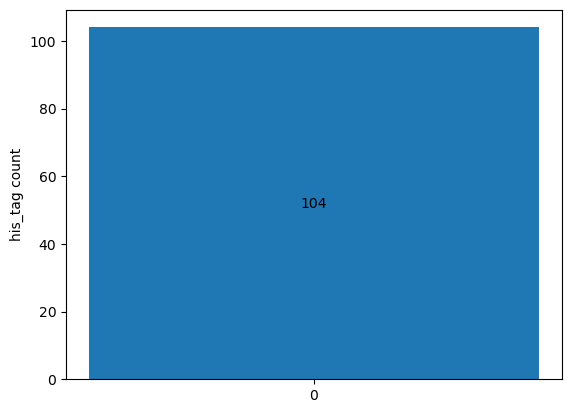

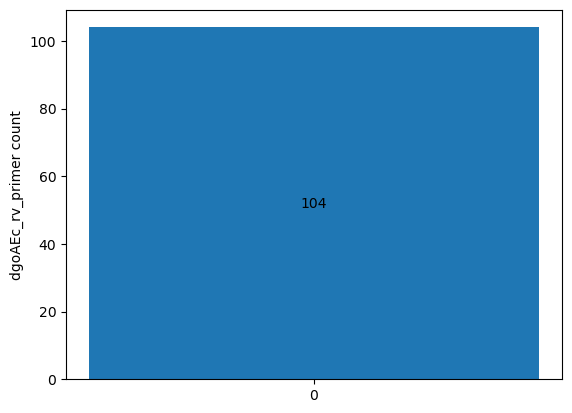

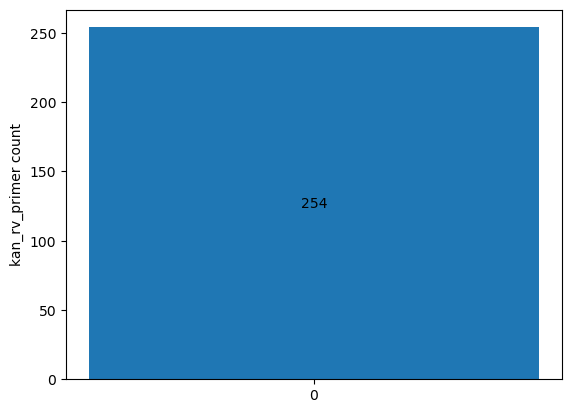

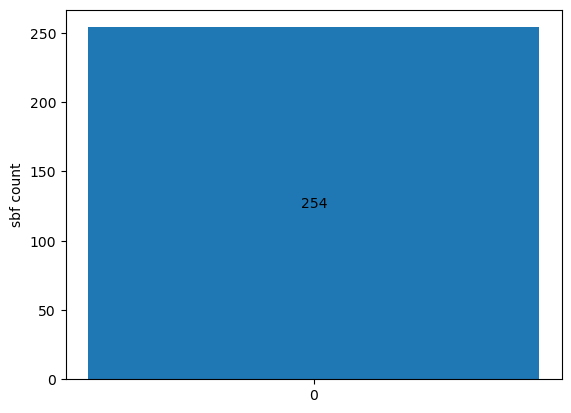

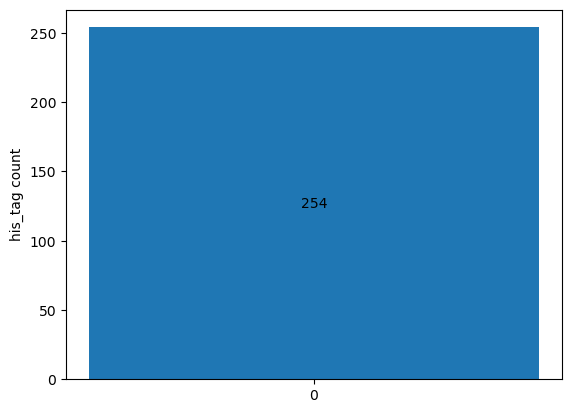

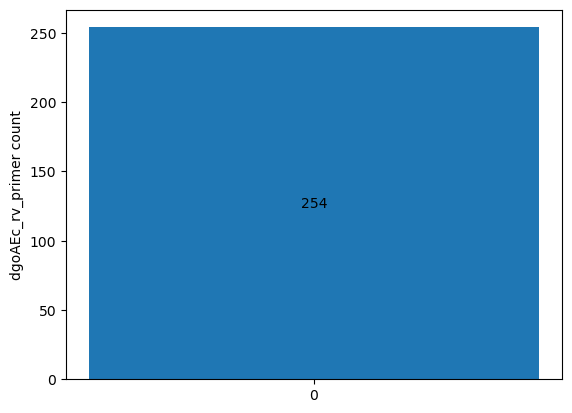

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [114]:
# Count features in two flank blast results and plot

from blast import count_features_in_blast_results, plot_feature_counts

[
    count_features_in_blast_results(
        x,
        features
    ).pipe(
        plot_feature_counts,
        features,
        out_pdf=x.replace('.tsv', '_feature_counts.pdf'),
        greaterorequal=False
    ) if count_features_in_blast_results(x, features) is not None else None
    for x in manifest['both_flanks_blast_results']
] 

In [115]:
# Count and sum features in both flanks blast results and add to manifest

from blast import count_features_in_blast_results

mean_feature_counts =[
    count_features_in_blast_results(
        x,
        features 
        )[list(features.keys())].mean()
    if count_features_in_blast_results(x, features) is not None else pd.Series(dict(zip(features.keys(), [None, None, None, None])))
    for x in manifest['both_flanks_blast_results']
]

mean_feature_counts = pd.DataFrame(mean_feature_counts)
mean_feature_counts.rename(columns={col: col+'_mean_both_flanks' for col in mean_feature_counts.columns}, inplace=True)

manifest = pd.concat([manifest, mean_feature_counts], axis=1)

File does not exist.
File does not exist.
File does not exist.
File does not exist.
File does not exist.


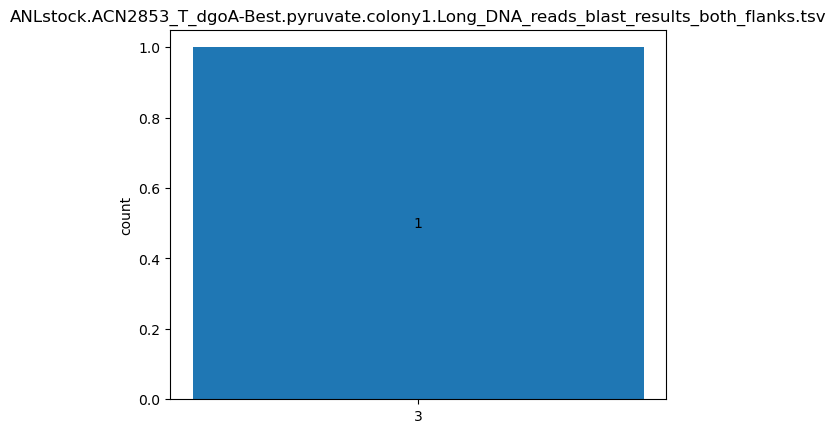

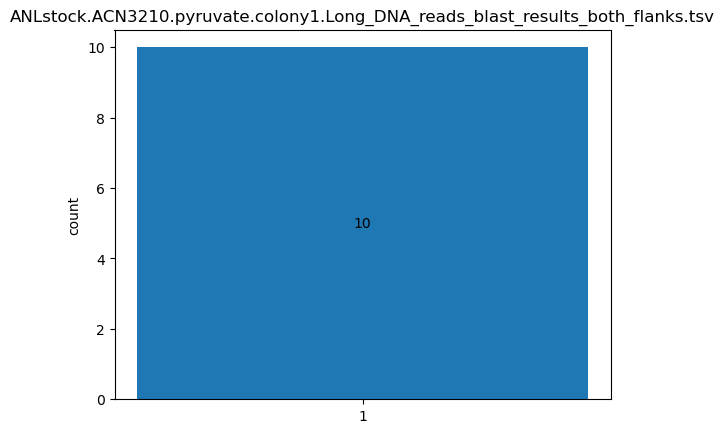

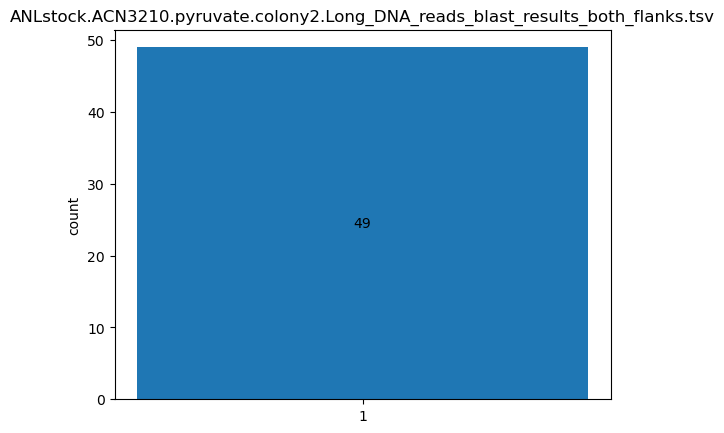

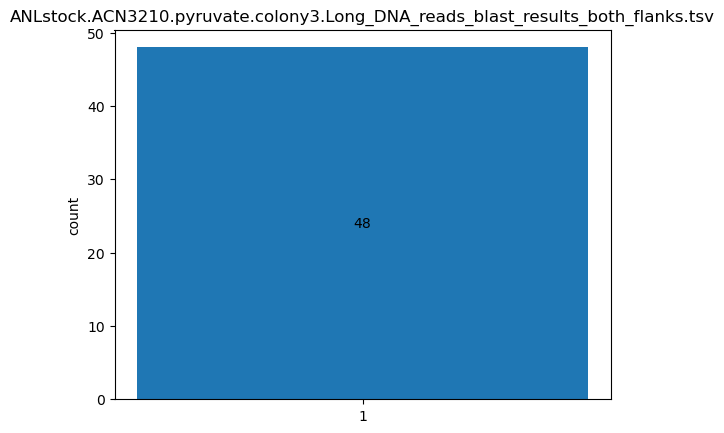

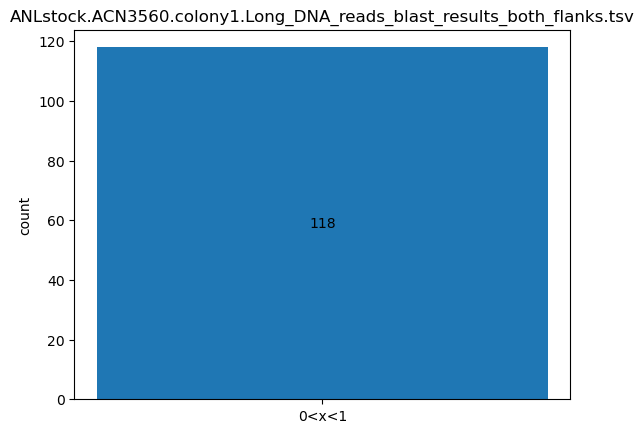

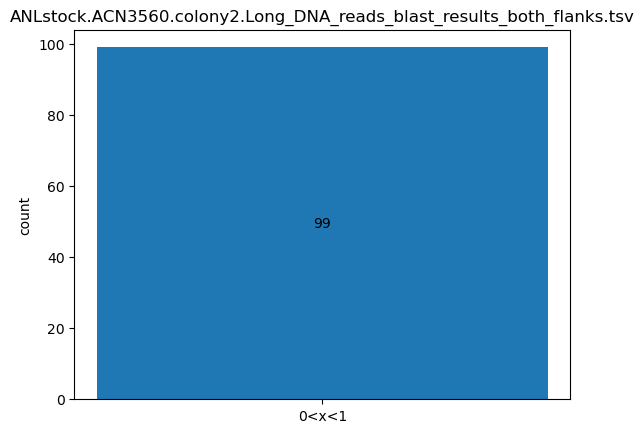

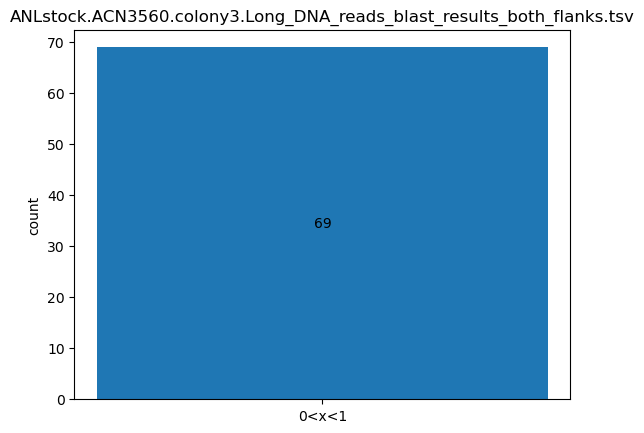

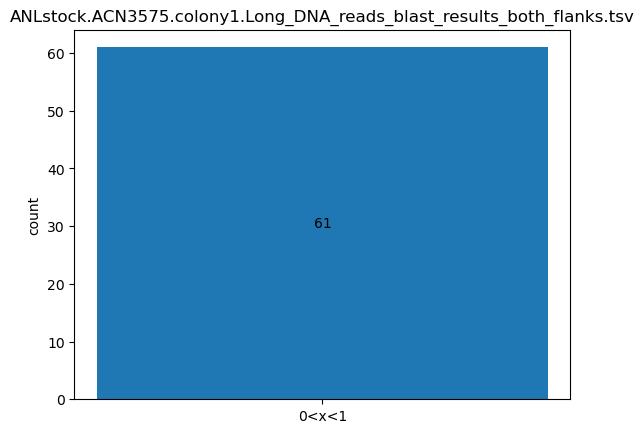

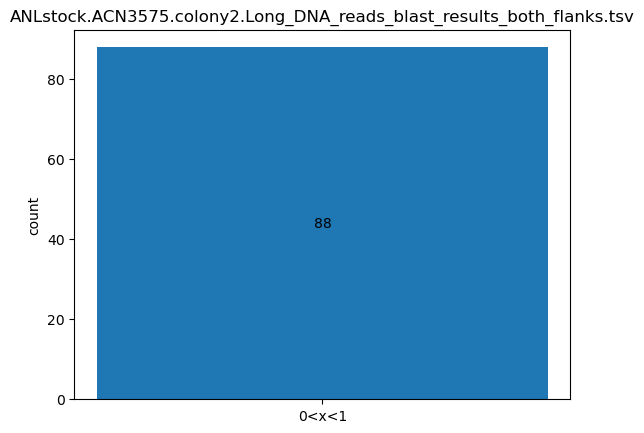

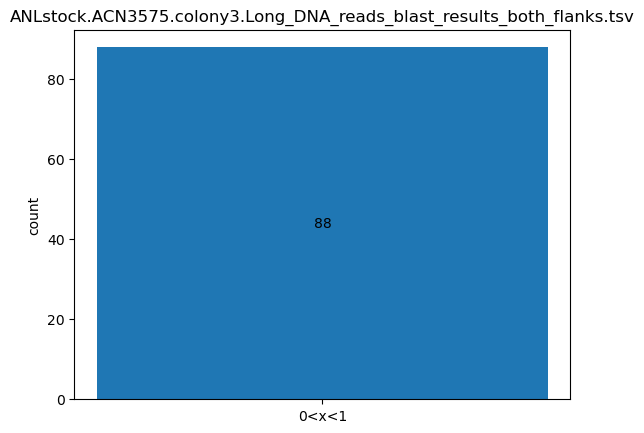

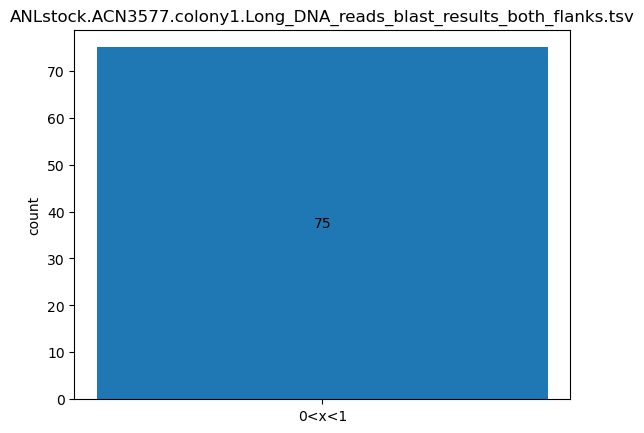

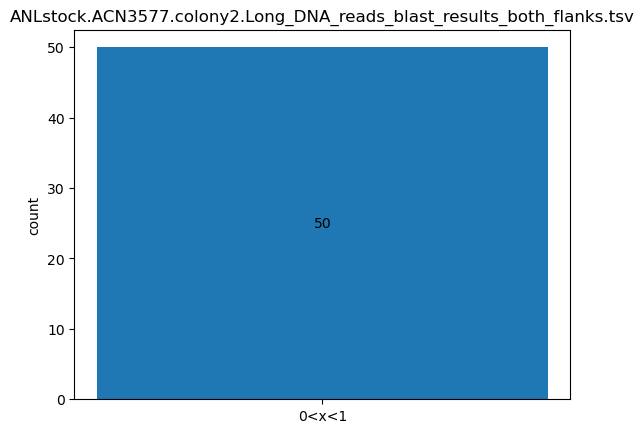

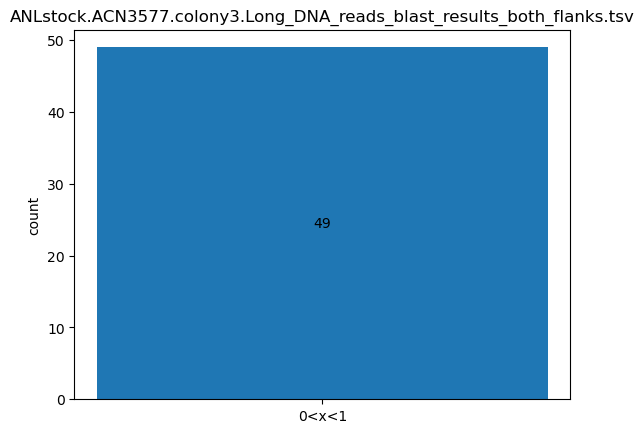

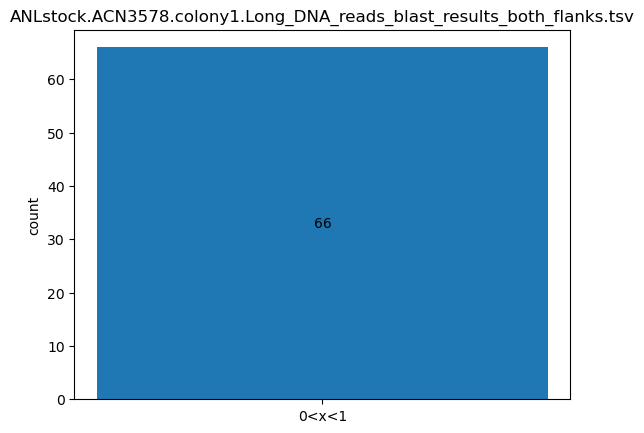

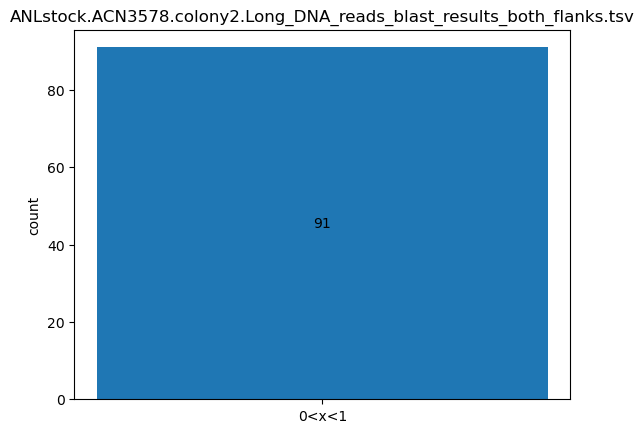

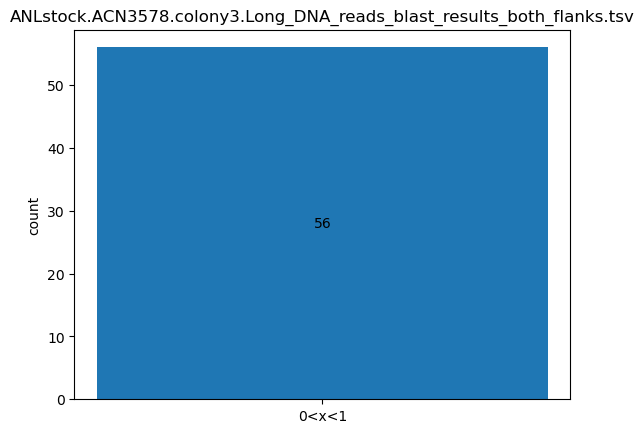

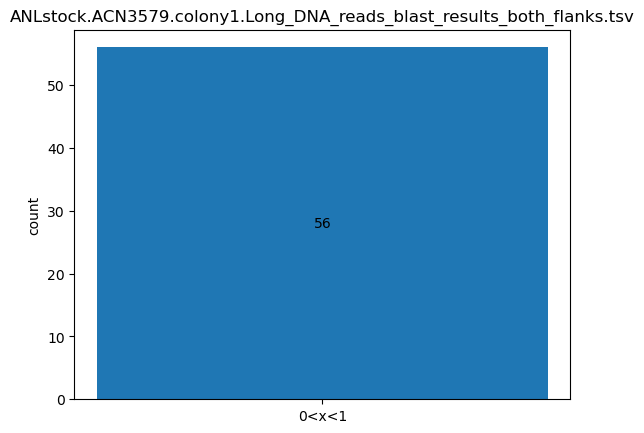

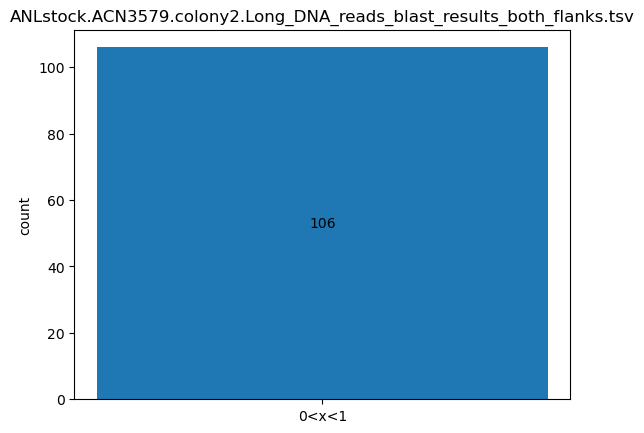

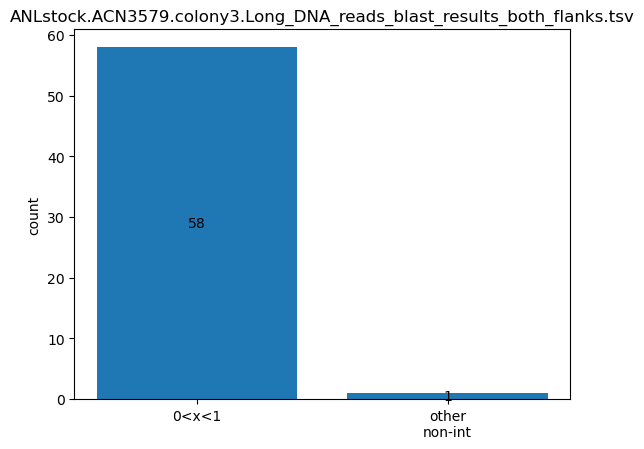

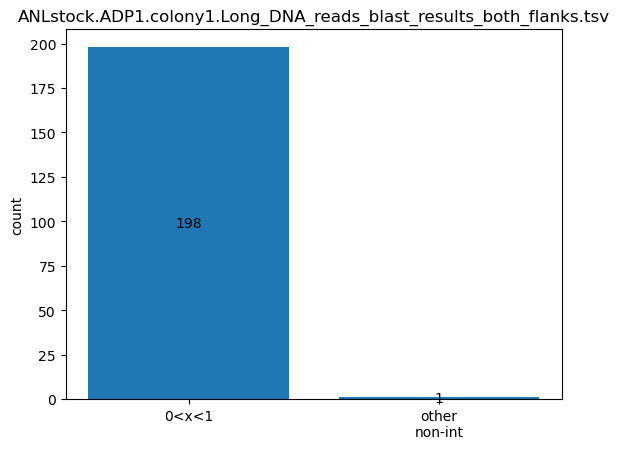

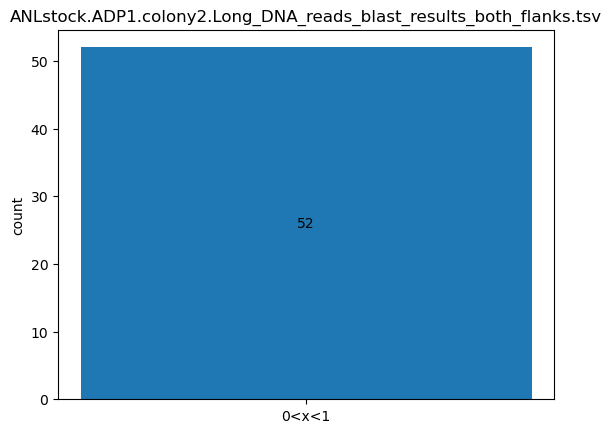

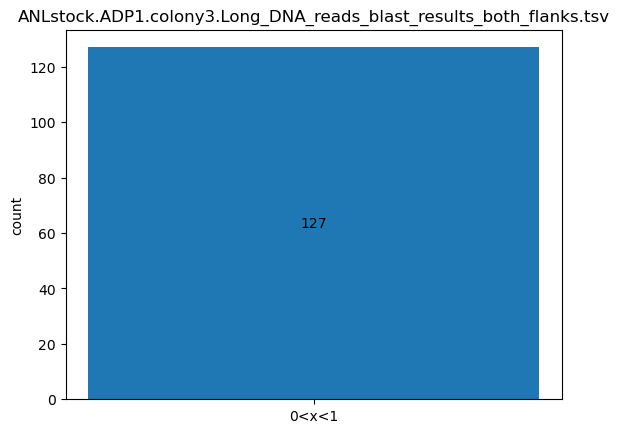

In [120]:
from blast import excise_insertion_seq

manifest['amplicon_multiple'] = [
    excise_insertion_seq(
        x,
        expect_amplicon_len = 6553,
        out_pdf = x.replace('.tsv', '_amplicon_multiples.pdf')
    )['n_amplicons'].mean()
    if x is not None else None
    for x in manifest['both_flanks_blast_results']
]